<a href="https://colab.research.google.com/github/saishshinde15/TensorFlow/blob/main/Ann_Classi_OneShort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [7]:
dataset=pd.read_csv('classification_in_asteroseismology.csv')

In [8]:
dataset

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


In [9]:
dataset.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [13]:
dataset.isnull().sum()

POP        0
Dnu        0
numax      0
epsilon    0
dtype: int64

In [14]:
dataset

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


In [15]:
X=dataset.iloc[:,1:4].values

In [16]:
X

array([[ 4.4478 , 43.06289,  0.985  ],
       [ 6.94399, 74.07646,  0.15   ],
       [ 2.64571, 21.57891,  0.855  ],
       ...,
       [ 3.98294, 30.90257,  0.88   ],
       [ 4.33893, 45.62183,  0.975  ],
       [ 3.74869, 37.94907,  0.205  ]])

In [17]:
y=dataset.iloc[:,0].values

In [18]:
y

array([1, 0, 1, ..., 1, 1, 1])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [26]:
len(X_train)

800

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
ann=tf.keras.models.Sequential()

In [78]:
ann.add(tf.keras.layers.Dense(units=12,activation='relu'))

In [79]:
ann.add(tf.keras.layers.Dense(units=4,activation='relu'))

In [80]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [92]:
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [93]:
history=ann.fit(X_train,y_train,batch_size=800,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.3990 - accuracy: 0.9350 - val_loss: 0.3939 - val_accuracy: 0.9403
Epoch 2/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3832 - accuracy: 0.9362 - val_loss: 0.3786 - val_accuracy: 0.9453
Epoch 3/200
1/1 [==============================] - 0s 53ms/step - loss: 0.3678 - accuracy: 0.9375 - val_loss: 0.3640 - val_accuracy: 0.9403
Epoch 4/200
1/1 [==============================] - 0s 38ms/step - loss: 0.3528 - accuracy: 0.9413 - val_loss: 0.3501 - val_accuracy: 0.9204
Epoch 5/200
1/1 [==============================] - 0s 37ms/step - loss: 0.3383 - accuracy: 0.9400 - val_loss: 0.3369 - val_accuracy: 0.9254
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 0.3243 - accuracy: 0.9325 - val_loss: 0.3244 - val_accuracy: 0.9254
Epoch 7/200
1/1 [==============================] - 0s 46ms/step - loss: 0.3108 - accuracy: 0.9337 - val_loss: 0.3124 - val_accuracy: 0.9254
Epoch 8/200
1/1 [=====

In [94]:
model1_eval=ann.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9751


In [95]:
model1_train=ann.evaluate(X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9800


<Axes: >

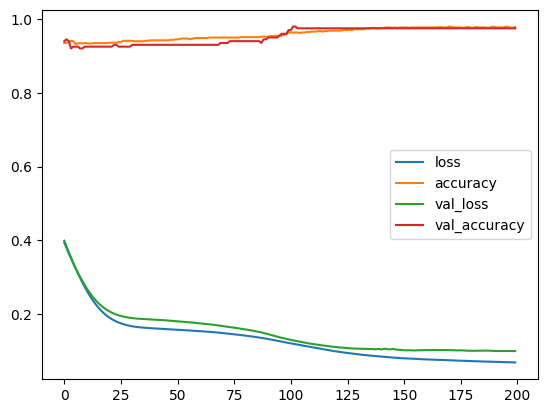

In [96]:
pd.DataFrame(history.history).plot() #accuracy depits training accuarcy and val_accuarcy depicts testing accuarcy

In [97]:
model_result=(['model 1',model1_eval])

In [98]:
model_result

['model 1', [0.09974341839551926, 0.9751243591308594]]

In [99]:
model_train=(['model 1',model1_train])

In [100]:
model_train

['model 1', [0.06870384514331818, 0.9800000190734863]]